# SETUP

In [ ]:
%pip install opencv-python matplotlib numpy tqdm "ipywidgets>=7.0,<8.0" IProgress

In [3]:
!sudo apt update >/dev/null 2>&1
!sudo apt install libgl1-mesa-glx -y >/dev/null 2>&1

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm.auto import tqdm

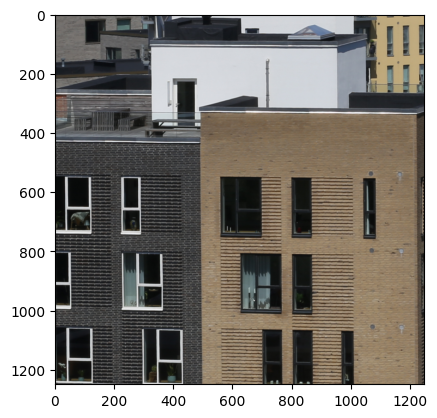

In [2]:
img = cv2.imread("assets/testimg.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
def calculate_gradients(img):
    sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    magnitude = np.zeros(img.shape[:2])
    orientation = np.zeros(img.shape[:2])
    for i in tqdm(range(1, img.shape[0] - 1)):
        for j in range(1, img.shape[1] - 1):
            # Calculate the gradient
            gx = np.sum(img[i-1:i+2, j-1:j+2] * sobelx)
            gy = np.sum(img[i-1:i+2, j-1:j+2] * sobely)
            # calculate the magnitude and orientation
            mag = np.sqrt(gx**2 + gy**2)
            ori = np.arctan2(gy, gx)
            magnitude[i, j] = mag
            orientation[i, j] = ori
    return magnitude, orientation

magnitude, orientation = calculate_gradients(img)


  0%|          | 0/1248 [00:00<?, ?it/s]

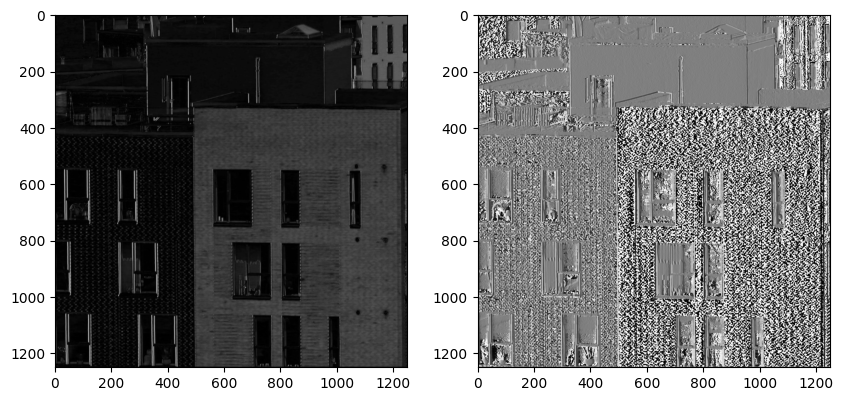

In [4]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(magnitude, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(orientation, cmap="gray")
plt
plt.show()


In [5]:
def calculate_histograms(orientation, magnitude, cell_size=8):
    histograms = []
    for i in tqdm(range(0, img.shape[0]-cell_size, cell_size)):
        for j in range(0, img.shape[1]-cell_size, cell_size):
            # Calculate the histogram
            hist = np.zeros(9)
            for k in range(cell_size):
                for l in range(cell_size):
                    ori = orientation[i+k, j+l]
                    mag = magnitude[i+k, j+l]
                    # Calculate the bin
                    bin = int(ori * 9 / (2 * np.pi))
                    hist[bin] += mag
            histograms.append(hist)
    return histograms

histograms = calculate_histograms(orientation, magnitude)

  0%|          | 0/156 [00:00<?, ?it/s]

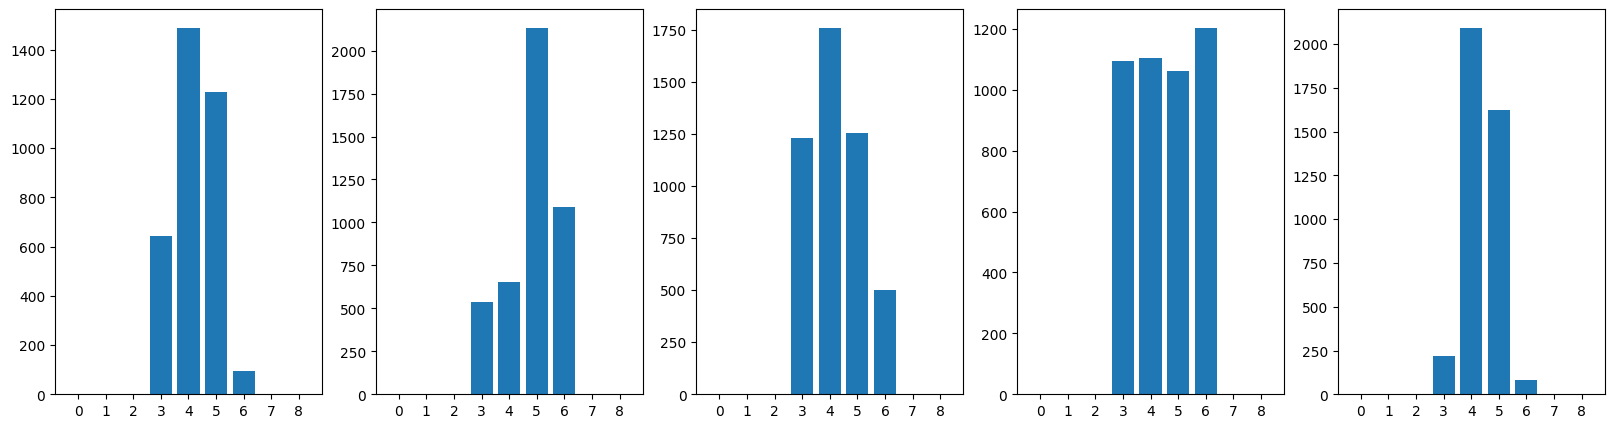

In [ ]:
# show first 5 histogram
plt.figure(figsize=(20, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.bar(range(9), histograms[i])
    plt.xticks(range(9))
plt.show()
